In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulation import Simulation
from augmentation_pipeline import AugmentationPipeline

First, we identiy all files in the directory. (to-do, once data normalization is finished)

##### Steps
1. Create a simulation object
2. Create a pipeline. This pipeline is randomized upon creation.
3. Create a new simulation object from this pipeline.
4. Check if the new simulation object is not the same as the original (by random chance).
    - If it is the same, try again.
5. From each simulation, create 4 new (augmented simulations).
6. Save the simulations.

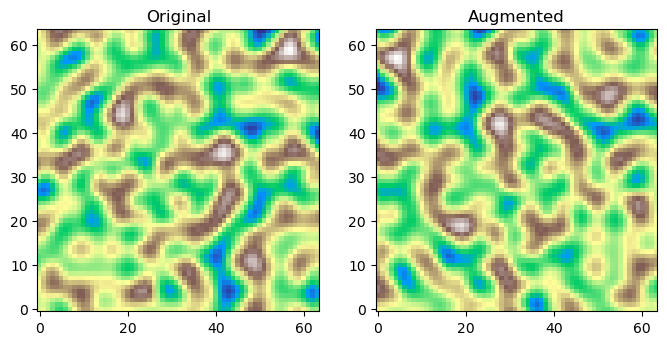

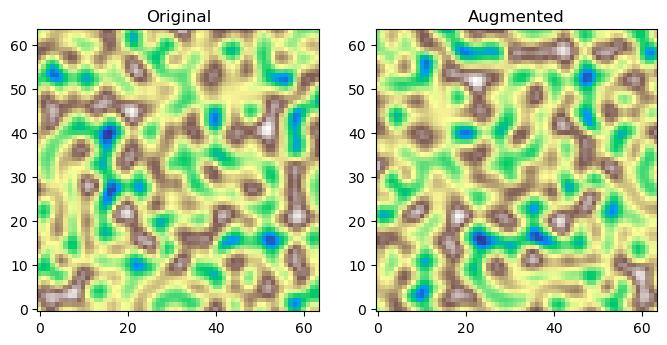

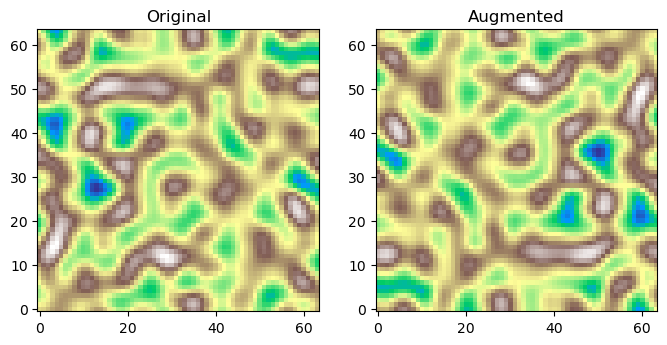

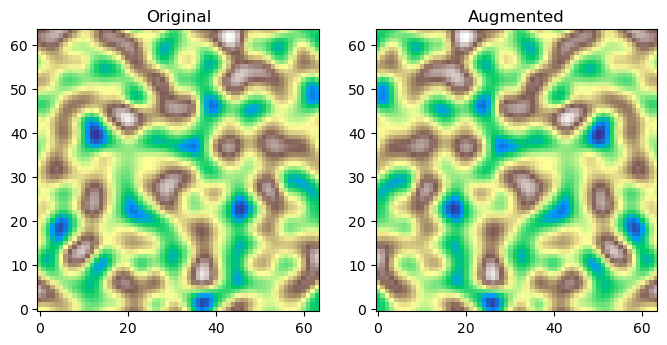

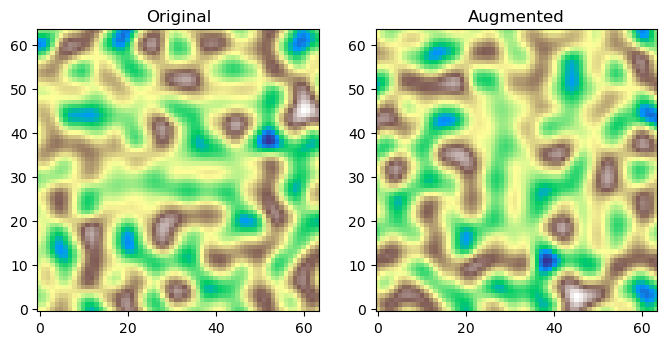

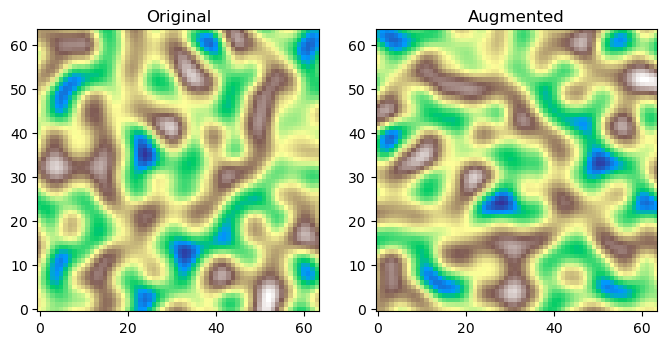

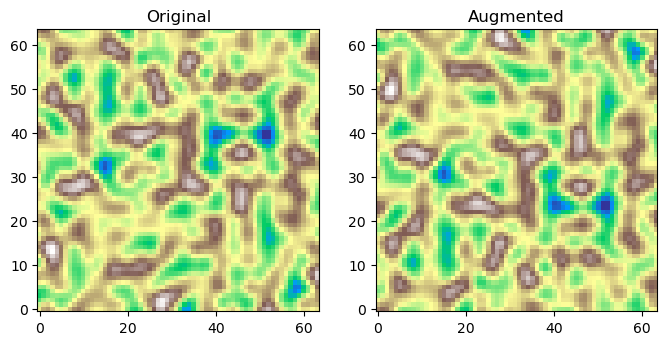

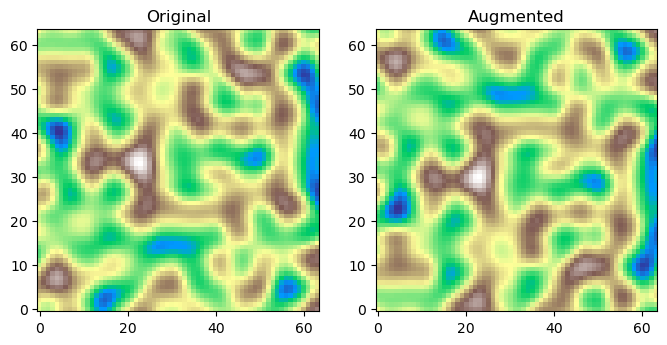

In [2]:
number_grids = 64
save_folder = "../data/raw_datasets"
sim_numbers = range(1, 80+1)

store_augmented_data_folder = "../data/augmented_data"

for sim_number in sim_numbers:
    # Load a simulation
    sim = Simulation.load_simulation(save_folder, sim_number, number_grids)

    # eps is the sum of squared differences between the newly generated topography and the old topography. 
    # If this is 0, the pipeline should re-run.
    eps = 0
    while eps < 1e-10:
        # Randomly initialize an augmentation
        aug_pipeline = AugmentationPipeline()
        aug_sim = aug_pipeline.transform_simulation(sim)

        # Calculate sum of square differences to make sure we did not generate the same data again.
        eps = np.sum((sim.topography - aug_sim.topography)**2)
    
    # Plot every 10th generated simulation.
    if sim_number%10==0:
        fig, axs = plt.subplots(1,2,figsize=(8,4))
        axs[0].imshow(sim.topography, cmap="terrain", origin="lower")
        axs[1].imshow(aug_sim.topography, cmap="terrain", origin="lower")
        
        axs[0].set_title("Original")
        axs[1].set_title("Augmented")